# Modelo matemático de rede neural perceptron de múltiplas camadas e sua implementação detalhada em Python usando numpy

# 1. Introdução

O presente artigo apresenta a teoria por trás da rede neural perceptron de múltiplas camadas, além da implementação prática detalhadamente em Python, usando a biblioteca numpy.

Uma rede neural artificial simula uma rede neural biológica.

Enquanto o perceptron de camada simples gera uma reta de decisão, isso é, ele é adequado quando as classes são separáveis linearmente, o perceptron de camada múltipla gera uma curva de decisão, de modo que é adequado quando as classes não são linearmente separáveis.

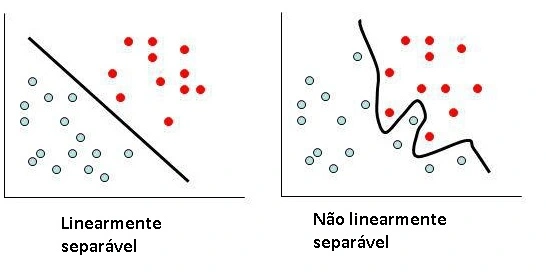

### Conteúdo

1. Introdução


2. Teoria

    2.1 Criando a curva de decisão
    
        2.1.1 Calculando Pesos(k) distantes da camada de saída
        
    2.2 Método da descida do gradiente
    
        2.2.1 Algoritmo de backpropagation

3. Implentação da rede neural artificial de perceptron de múltiplas camadas

    3.1 Treinamento e teste com dados conhecidos
    
    3.2 Teste e avaliação com dados desconhecidos

# 2. Teoria

## 2.1 Criando a curva de decisão

Para entender bem a criação da curva de decisão, lembremos de como funciona a geração de uma reta de decisão de um modelo perceptron de camada simples.
Para a geração da reta, usamos o seguinte percurso:

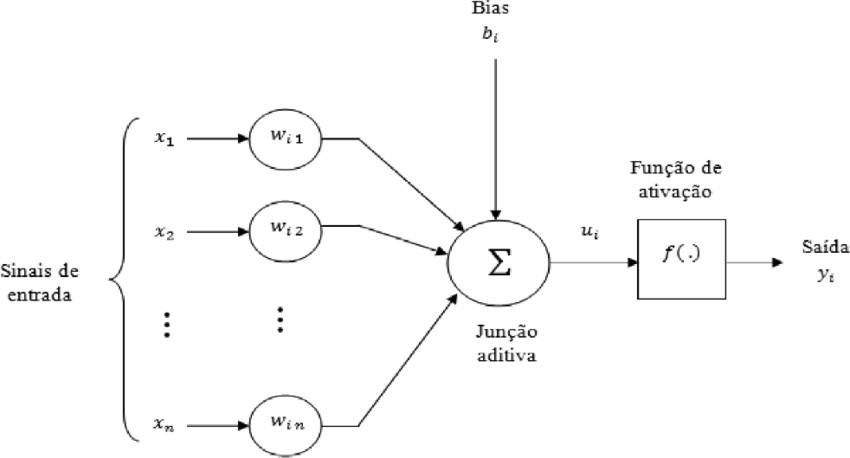

**Dicionário**

Sinais de entrada Xn: informações/atributos, como cor, tamanho, altura e peso;

Pesos Wn: funcionam como sinapses de um neurônio biológico. Esses pesos/sinapses podem assumir valores positivos, negativos e nulos. Os resultados de todas as entradas ponderadas (multiplicadas) pelos seus respectivos pesos serão somadas juntamente com o bias.

Bias bi: valor que se refere ao grau de liberdade, isso é, a flexibilidade do modelo.

ui: campo induzido. O valor de u é entregue à função f(u).

Função de ativação f(V): o trabalho da Função de Ativação é avaliar o valor de u e decidir se o neurônio artificial dispara ou não, isso é, se y é igual a 1 ou -1.

**Arquitetura do neurônio perceptron de camada simples**

1. A rede recebe as entradas X's ou Xb's;
2. Ocorre a multiplicação com os pessoas W's;
3. Ocorre o cálculo de U;
4. Ocorre o cálculo de f(U);
5. A saída é gerada;
6. Ocorre o cálculo do erro, e = Ypredito/desejado - Yreal;
7. Ocorre o recálculo com taxa de aprendizagem, alterando os W's;
8. A partir do passo 3, o processo se repete até o ponto ótimo possível ser encontrado, de acordo com as configurações do modelo, como valor de época e taxa de aprendizagem, além da adequação dos dados.

Todavia, quando se trata de um modelo de camada múltipla, a arquitetura muda:
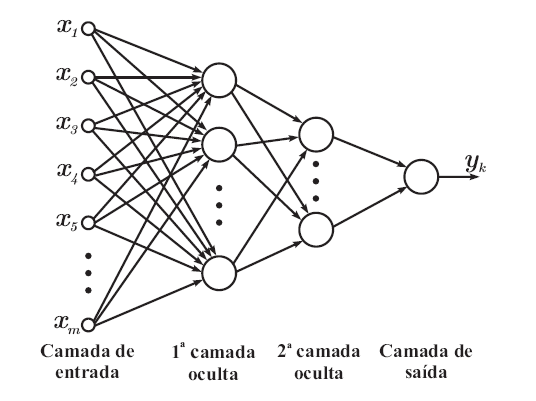

A ilustração acima mostra duas camadas e, após, a camada de saída. Enquanto o modelo de camada simples apresenta uma arquitetura menor, observando da entrada à saída, o modelo de múltiplas camadas apresenta uma arquitetura maior. Dessa forma há aumento da quantidade de pesos. Observando a imagem, temos os pesos nas conexões entre a **camada de entrada** e **primeira camada oculta** e nas conexões entre a **Primeira Camada Oculta** e **segunda camada oculta**. 

Conforme a arquitetura do modelo simples, os pesos são ajustados a partir do valor de *Y(k)*, o qual é inserido na função:

*W(K + 1) = W(K) + Heta * [Ypredito(k) - Yreal] * Xb(k)*.

Porém, na arquitetura de múltiplas camadas, há *n* pontos de pesos entre uma camada e outra. Se o valor de *y(k)* somente é dado no final da arquitetura, como ajustar pesos que estão distantes da camada de saída, de onde deriva o erro *e(k)*? Para melhor compreensão dessa pergunta, observe a ilustração abaixo:
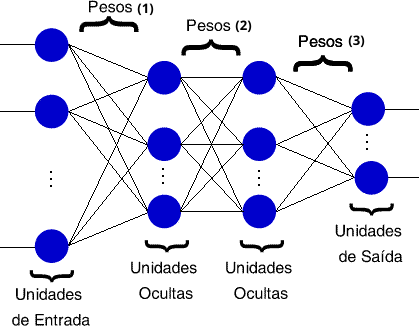

*OBS: Pesos (1) - lê-se pesos de índice 1; Pesos (2) - lê-se pesos de índice 2; Pesos (n) - lê-se pesos de índice n.*



Considerando a imagem acima, compreenda que as **Unidades de Saída** ou **Camadas de saída** entregam o *y(k)*, de onde se deriva o erro *e(k)*. Esse *y(k)* adentra na fórmula de ajuste dos **Pesos (3)**. Para o ajuste dos **Pesos (1)** e **Pesos (2)**, pelos percusos que já apresentamos aqui, deveriam haver erros *e(k)* após cada camada dos pesos mencionados, isso é, os **Pesos (1)**, os **Pesos (2)** e os **Pesos (3)**. Entretanto, isso não está possibilitado na arquitetura. Como resolter esse problema?

Entre a camada de saída e a última camada de pesos, no caso da ilustração, o ajuste dos Pesos (3) mantém-se da mesma forma como ocorre com o perceptron de camada simples, ou seja:

W(K + 1) = W(K) + η  * e(k) * Xb(k) 

ou, esteticamente mais teórico

W(k + 1) = W + ηeXb

Contudo, a técnica para os demais Pesos(k) difere.

### 2.1.1 Calculando Pesos(k) distantes da camada de saída

Para calcular os Pesos(k) distantes da camada de saída, o algoritmo backpropagation, em português, retropropagação, resolve, propagando o erro para as demais camadas.

Observe a ilustração a seguir:
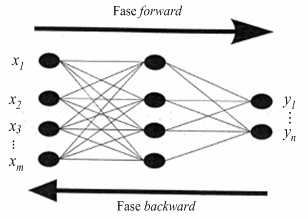

A ideia é simplesmente fazer o processo para obter o erro *e(k)*, isso é, operar a funcionalidade da arquitetura a partir da camada de entrada para a camada de saída. Após a obtenção do erro, o processamento inverte, partindo da camada de saída para a camada de entrada. Nesse processamento inverso, o erro é propagado nos Pesos(k).

Esse erro é propagado pelo gradiente do erro. O processo de gradiente do erro é um processo derivacional, conforme demonstra a ilustração abaixo.
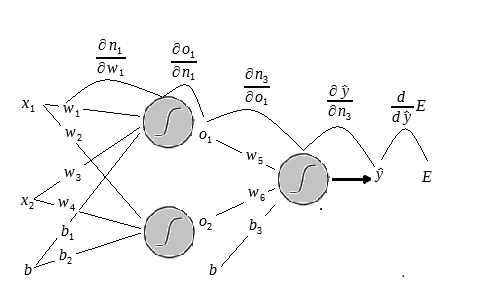

onde

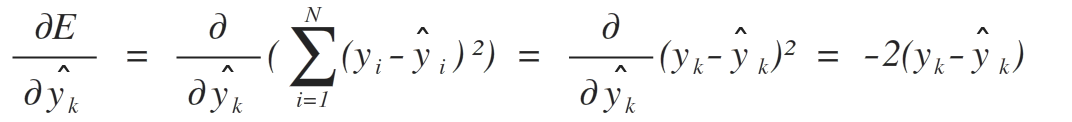

ou seja, a derivação do erro em função de *Y(k)* é igual a *-2(Yreal - Ypredito)*.

#### Compreendendo a retropropagação no passo a passo

1. e(k) passa a ser sinal de entrada;
2. Calcula-se o gradiente do erro δ(k);
3. Calcula-se δ(k) * W(k)transposto, obtendo o vetor induzido do gradiente de erro δ(k):
    
    Vδ(k) = δ(k) * W(K)t
    
    
4. Calcula-se, a partir do Vδ(k) encontrado, os demais gradientes das demais camadas.

## 2.2 Método da descida do gradiente

Vamos iniciar a introdução desse conceito com uma analogia. Para isso, considere a imagem a seguir:
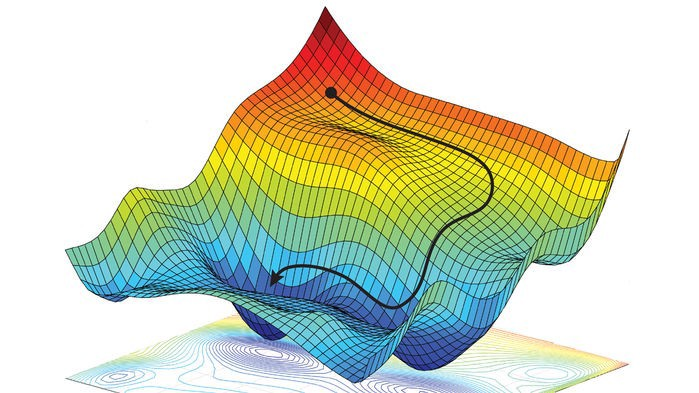

Suponhemos que um alpinista queira sair da localização indicada pela seta e chegar ao fim da linha conectada na seta, que vai até ao ponto preto na parte superior da imagem. Ele quer fazer isso no menor tempo possível. Qual a melhor estratégia para alcançar esse objetivo? Buscar os pontos mais íngrimes a cada passo que der. Se ele for por um percurso plano, nunca chegará ao topo. Seguir por caminho íngrime é necessário. Essa é a ideia do gradiente; e para isso fazemos uso do cálculo integral-diferencial.

No entanto, trabalhando com o erro da rede neural, estamos interessados não em subir ao topo, mas, encontrar o ponto mais baixo. Isso é a minimização do erro pelo método de gradiente, o que significa aprendizagem da rede neural. Portanto, queremos o negativo do gradiente, pois, o positivo do gradiente é subir.

Partindo dessa compreensão, então, ocorre que o alpinista passa a sair, na verdade, do ponto mais alto, focando o ponto mais baixo, a fim de alcançá-lo em menos tempo. E para isso, buscará os passos mais íngrimes.

#### Entendendo a matemática do gradiente

Quando falamos do gradiente, estamos falando de funções que possuem múltiplas entradas e uma única saída, isso é, um valor escalar. Em resumo, dado um vetor de *d* dimensões, retorna-se uma unidade *n*:

F: Rn -> R

onde 

F: função;
Rn: espaço dos números reais de *n* dimensões;
R: único número real.

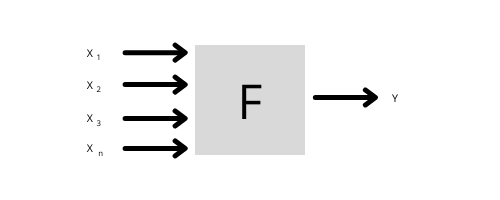

Considere o gráfico de gradiente abaixo. O encontro das retas dos valores de y e x definem a região (azul ou vermelha ou verde) e a altura. Quanto mais vermelho, mais alto o valor de z, e quanto mais azul, mais baixo o valor de z.

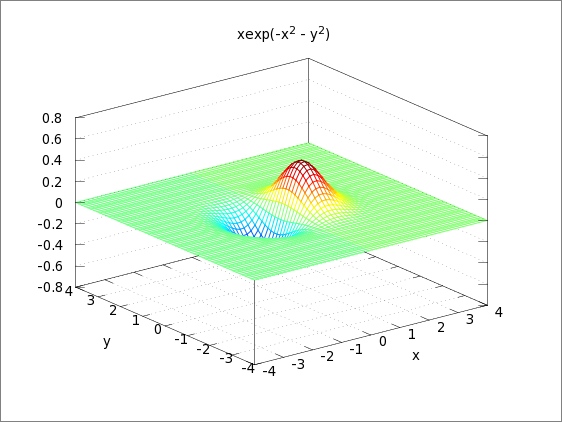

Como mencionado acima, o processo de calcular o erro do gradiente é um processo derivacional, portanto, podemos definir que **o gradiente de uma função *F: Rn -> R* é um vetor de *n* componentes, onde, cada componente é a derivada parcial da função em relação a cada uma de suas entradas**.

O gradiente de uma função pode ser representado matematicamente da seguinte forma:
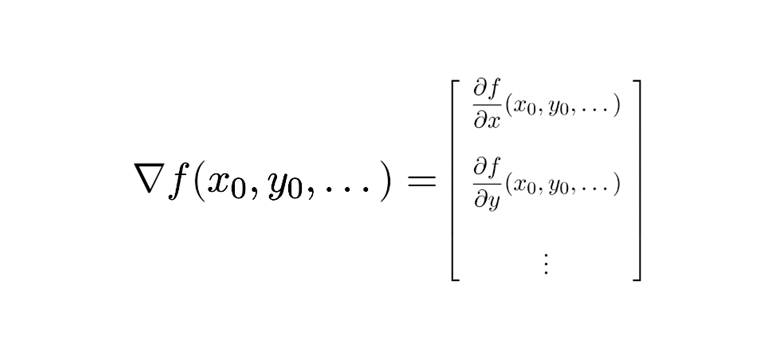

Onde ∇ (nabla) é o vetor em que cada componente é a derivada da função em relação a cada uma das entradas. Sendo assim, o vetor gradiente depende das entradas. Por se tratar de uma ação derivacional, **o gradiente representa uma direção no espaço n-dimensional**.

Devido à essa mobilidade, o vetor gradiente indica em qual direção ajustar os parâmetros (*x1, x2, x3, ... xn*) da função (*F*) para que a mesma tenha o máximo incremento. 

Wt+1 = Wt + η∇f(Wt)

temos que:
    f(Wt+1) >= f(Wt)
    
    onde, por garantia, η deve ser infinitesimalmente pequeno.

Sendo *Wt + η∇F(Wt)* um movimento de subida do gradiente, então, *Wt - η∇F(Wt)* é um movimento de descida do gradiente, de modo que *f(Wt+1) <= f(Wt)*

onde 

*f(Wt+1)*: função custo ou erro que queremos minimizar

e 

*η*: taxa de aprendizagem

Se realizarmos pequenos ajustes nas componentes do vetor de entrada na direção oposta à direção do gradiente, novas coordenadas são retornadas com valor de saída menor. Se esse processo for repetido *n* vezes, pode-se encontrar a minimização otimizada do erro.

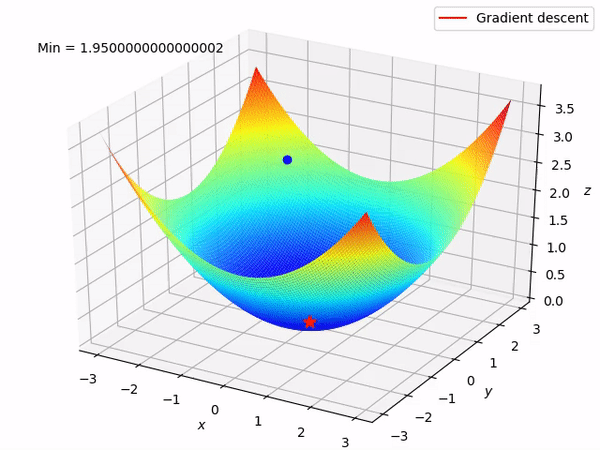

### 2.2.1 Algoritmo de backpropagation

#### Definições iniciais

m - Número de neurônios da camada de entrada

N - Número de neurônios da camada escondida ou intermediária

L - Número de neurônios da camada de saída

X - Vetor de entrada, X E Rmx1

Xb - Vetor de entrada com bias, Xb = [+1 X]t

o - Vetor de saída da camada escondida, o E Rnx1

ob - Vetor de entrada da camada de saída, ob = [+1 o]t

#### Passo a passo

1. Propagação do sinal de entrada:
    
    *v(1) = W(1)Xb*, onde *Xb* é o vetor de entrada que multiplica-se pela *W(1)*, obtendo um vetor de campo induzido de superíndice 1 *v(1)*;
    
    *o = tanh(v(1))*, onde o vetor de campo induzido de superíndice 1 recebe aplicação de uma tangente hiperbólica, obtendo o vetor *o*, o qual é a saída da camada intermediária e entrada da camada de saída;
    
    *v(2) = W(2)ob*, onde o vetor *o* recebe o bias e multiplica-se com o *W(2)* resultando no vetor de campo induzido de superíndice 2;
    
    *y = tanh(v(2))*, onde o vetor de campo induzido de superíndice 2 recebe aplicação de uma tangente hiperbólica, obtendo a saída da rede neural.
    
    
2. Cálculo do erro:

    *e = d - y*, e E RLx1
    
    
3. Retropropagação do sinal de saída:

    *δ(2) = diag(e)[1vetorial - diag(y)y], δ(2) E RLx1*, onde o vetor de erro recebe diagonalização e multiplica-se pela subtração entre o 1 vetorial e a diagonização do Y que multiplica-se com o próprio y, obtendo o vetor gradiente de superíndice 2 *δ(2)*;
    
    *vδ = W(2)t δ(2)*, onde o vetor gradiente de superíndice 2 é multiplicado pela matriz transposto de peso de superíndice 2, obtendo o vetor de campo induzido do gradiente;
    
    *δ(1) = diag[1vetorial - diag(o)o]vδ*, onde ocorre a diagonização da subtração entre 1 vetorial e a multiplicação entre a diagonização do vetor o pelo vetor 0, por fim, multiplicando pelo vetor de campo induzido do gradiente, resultando no gradiente da camada 1.
    
    
4. Atualização dos pesos

      *W(1) = W(1) + ηδ(1)Xb*, onde multiplica-se o vetor de entrada-X-bias, gradiente da camada 1 e taxa de aprendizado, somando o produto à matriz de peso da camada 1, resultando na atualização da matriz de peso da camada 1.
      
      *W(2) = W(2) + ηδ(2)ob*, onde multiplica-se o vetor o-bias, gradiente da camada 2 e taxa de aprendizado, somando o produto à matriz de peso da camada 2, resultando na atualização da matriz de peso da camada 2.


#### Considerações

O processo se repete a partir do passo 2. Nesse loop, o erro total E(W(1), W(2), W(n)) é monitorado, tendo como objetivo a aproximação máxima a 0. Ao fim do treinamento, a rede neural está pronta para uso e requer apenas a fase de "Propagação". Não há mais necessidade do algoritmo de retopropagação, nem do cálculo de erros ou do gradiente, pois esses são apenas para a fase de treinamento.


#### Alertas

O algoritmo backpropagation, tal como apresentado, é suscetível a diversos problemas, tais como:

**a.** "Mínimos locais": quando o gradiente encontra lugares baixos, mas, que não são os mais baixos, configurando-se em problema de convergência prematura;

**b.** Overtraining: excesso de treinamento gerando incapacidade de generalização;

**c.** Matrizes de pesos mal-condicionadas: ocorre elementos com ordem de grandeza bem distintas, necessitando de regularização, por exemplo.

**d.** Quanto mais camadas, mais tempo de treinamento, mais custo computacional.

# 3. Implentação da rede neural artificial de perceptron de múltiplas camadas

Para implementar o modelo, teremos o seguinte cenário:

- 20 observações


- 4 atributos, sendo um o target (y), isso é, a coluna pagamento. A coluna ClienteID não é considerada, pois, se trata de um identificador de linha referente a um fictício cliente


- 2 classes


- No perceptron, a classe S (sim, pagou) será representada pelo valor 1 e a classe N (não pagou) será representada pelo valor -1.


- A coluna empréstimo se refere ao último empréstimo e o resultado de seu pagamento ou não está definido pela variável pagamento.

As 20 observações se tratam hipoteticamente de clientes de um banco que solicitaram empréstimos e dentre eles há os adimplentes e os inadimplentes:

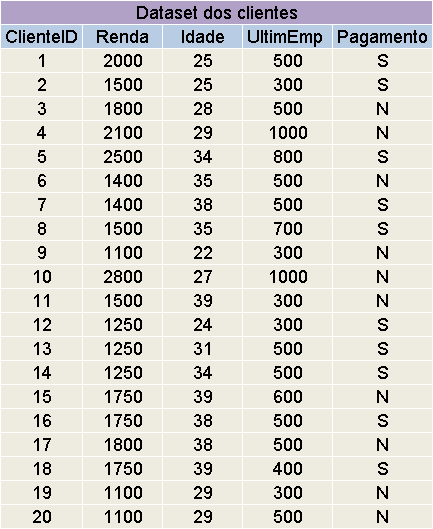

Para compreender melhormente a disposição das variáveis preditoras, observe o gráfico 3D abaixo após importação de bibliotecas para geração das variáveis e do gráfico:

inicio importando as bibliotecas de base.

In [1]:
#Importando as bibliotecas de base
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

Antes da geração do gráfico, crio as variáveis e gero um dataframe para observação

In [2]:
#Definindo as variáveis
renda = np.array([2000, 1500, 1800, 2100, 2500, 1400, 1400, 1500, 1100, 2800,1500, 1250, 1250, 1250, 1750, 1750, 1800,
                 1750, 1100, 1100])
idade = np.array([25, 25, 28, 29, 34, 35, 38, 35, 22, 27, 39, 24, 31, 44, 39, 38, 38, 39, 29, 29])
emprestimo = np.array([500, 300, 500, 1000, 800, 500, 500, 700, 300, 1000, 300, 300, 500, 500, 600, 500, 500, 400, 300,
                      500])
pagamento = np.array([1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, -1, -1])

In [3]:
#Gerando dataframe
df = pd.DataFrame([renda, idade, emprestimo, pagamento], index=['renda', 'idade', 'emprestimo', 'pagamento']).transpose()
df #Dataframe gerado com técnica de transposição devido à criação de arrays

,renda,idade,emprestimo,pagamento
0,2000,25,500,1
1,1500,25,300,1
2,1800,28,500,-1
3,2100,29,1000,-1
4,2500,34,800,1
5,1400,35,500,-1
6,1400,38,500,1
7,1500,35,700,1
8,1100,22,300,-1
9,2800,27,1000,-1


Após as execuções acima, gero o gráfico

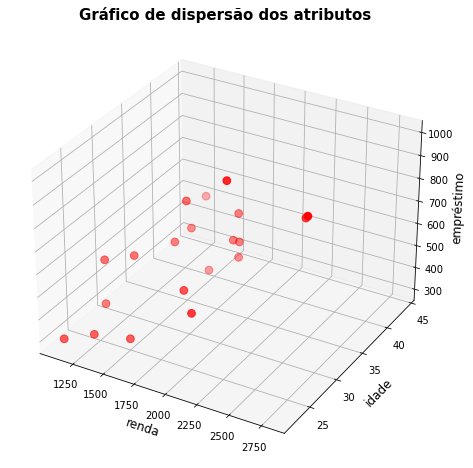

In [4]:
#Gerando gráfico 3D para atributos preditores
fig = plt.figure(figsize=(12, 8))
axes = plt.axes(projection='3d')
axes.scatter3D(renda, idade, emprestimo, color='red', s=60)
axes.set_title('Gráfico de dispersão dos atributos', fontsize=15, fontweight='bold')
axes.set_xlabel('renda', fontsize=12)
axes.set_ylabel('idade', fontsize=12)
axes.set_zlabel('empréstimo', fontsize=12);

Esses dados não são linearmente separáveis, cumprindo o requisito para a construção necessária de uma curva de decisão.

## 3.1 Treinamento e teste com dados conhecidos

Após gerar o gráfico, implemento o passo a passo do perceptron de múltplias camadas. Ainda que eu tenha definido os valores das variáveis acima, as definirei novamente nas mesmas variáveis, por questão didática.

Erro Total Médio: 
[0.86605212 0.81876447 0.74535326 0.64909084 0.56774582 0.53013226
 0.51968939 0.51775675 0.51768264 0.51786533 0.51800927 0.51809352
 0.51813837 0.51816133 0.51817287 0.51817863 0.51818148 0.5181829
 0.5181836  0.51818395 0.51818412 0.5181842  0.51818425 0.51818427
 0.51818428 0.51818428 0.51818428 0.51818429 0.51818429 0.51818429
 0.51818429 0.51818429 0.51818429 0.51818429 0.51818429 0.51818429
 0.51818429 0.51818429 0.51818429 0.51818429 0.51818429 0.51818429
 0.51818429 0.51818429 0.51818429 0.51818429 0.51818429 0.51818429
 0.51818429 0.51818429]


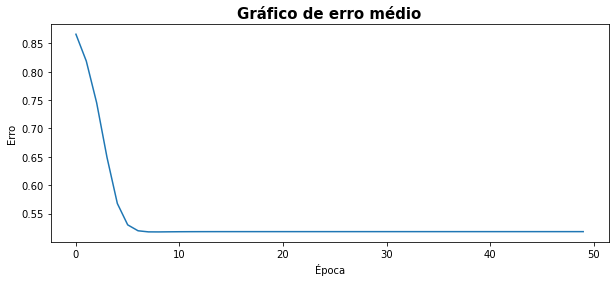

Teste de Erro: 
[ 1.03397152  1.03397152 -0.96602848 -0.96602848  1.03397152 -0.96602848
  1.03397152  1.03397152 -0.96602848 -0.96602848 -0.96602848  1.03397152
  1.03397152  1.03397152 -0.96602848  1.03397152 -0.96602848  1.03397152
 -0.96602848 -0.96602848] 


Vetor de Desempenho: 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Acurácia da aprendizagem da rede: 
100%


In [270]:
#Definindo as variáveis
renda = np.array([2000, 1500, 1800, 2100, 2500, 1400, 1400, 1500, 1100, 2800,1500, 1250, 1250, 1250, 1750, 1750, 1800,
                 1750, 1100, 1100])
idade = np.array([25, 25, 28, 29, 34, 35, 38, 35, 22, 27, 39, 24, 31, 44, 39, 38, 38, 39, 29, 29])
emprestimo = np.array([500, 300, 500, 1000, 800, 500, 500, 700, 300, 1000, 300, 300, 500, 500, 600, 500, 500, 400, 300,
                      500])
Yreal = np.array([1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, -1, -1]) #Vetor de class. desejada

#Definindo o número de amostras
amostra_q = 20

#Definindo o número de épocas
num_epocas = 50

#Definindo bias
bias = 1

#Definindo taxa de aprendizado
heta = 0.009

#Definindo Neurônios
m = 3 #Número de neurônios na camada de entrada
N = 3 #Número de neurônios na camada escondida
L = 1 #Número de neurônios na camada de saída

#Definindo aleatoriedade inicial para os pesos
W1 = np.random.random([N, m + 1]) #Definindo as dimensões de W1 - linhas e colunas
W2 = np.random.random([L, N + 1]) #Definindo as dimensções de W2 - linhas e colunas
        #Código para geração de matriz que evita loop e generalizar formato pela alteração dos dos números de neurônios
    
#Criando vetor de erros
e = np.zeros(amostra_q)
e_medio = np.zeros(num_epocas)

#Definindo entrada do perceptron
X = np.vstack([renda, idade, emprestimo])

#Definindo treinamento
for epoca in range(num_epocas):
    for amostra in range(amostra_q):
        
        #CALCULANDO AS SAÍDAS DAS CAMADAS
        #Inserindo o bias no vetor de entrada
        Xb = np.hstack([bias, X[:,amostra]]) #Entregando o padrão para a rede para propagação
        
        #Obtendo o campo induzido (1) para o cálculo da saída da camada escondida: o1
        V1 = np.dot(W1, Xb)
        
        #Aplicando tangente hiperbólica - Saída da camada escondida/intermediária
        o1 = np.tanh(V1)
        
        #Incluindo o bias ao vetor o1 - Saída da camada escondida é a entrada da camada de saída
        o1b = np.insert(o1, 0, bias)
        
        #Obtendo o campo induzido (2) para cálculo da camada de saída: y
        V2 = np.dot(W2, o1b)
        
        #Aplicando tangente hiperbólica - Resultado da camada de saída
        Ypredito = np.tanh(V2)
        
        #Calculando o erro
        erro = Yreal[amostra] - Ypredito
        
        #Calculando o erro total
        e[amostra] = (erro.transpose() * erro)/2 #Equação de erro quadrático
        
        #RETROPROPAGAÇÃO DO ERRO
        #Calculando o gradiente na camada de saída
        delta2 = np.diag(erro).dot([1 - Ypredito**2])
        
        #Calculando o campo induzido do gradiente na camada de saída
        Vdelta2 = np.dot(W2.transpose(), delta2)
        
        #Calculando delta 1
        delta1 = np.diag(1 - o1b**2).dot(Vdelta2)
        
        #Atualizando os pesos
        W1 = W1 + heta * (np.outer(delta1[1:], Xb))
        W2 = W2 + heta * (np.outer(delta2, o1b))
                 #outer() multiplica gerando vetor diferentemente de dot()
            
    #Calculando o erro total médio
    e_medio[epoca] = e.mean()

#Printando informações do erro total médio
print('Erro Total Médio: \n' + str(e_medio))

#Gerando gráfico do erro total médio
plt.figure(figsize=(10, 4))
plt.plot(e_medio)
plt.title('Gráfico de erro médio', fontsize=15, fontweight='bold')
plt.ylabel('Erro')
plt.xlabel('Época')
plt.show()

#TESTE DA REDE
#Definindo variável teste de erro
teste_de_erro = np.zeros(amostra_q)

for amostra in range(amostra_q):
    #CALCULANDO AS SAÍDAS DAS CAMADAS
    #Inserindo o bias no vetor de entrada
    Xb = np.hstack([bias, X[:,amostra]]) #Entregando o padrão para a rede para propagação
        
    #Obtendo o campo induzido (1) para o cálculo da saída da camada escondida: o1
    V1 = np.dot(W1, Xb)
        
    #Aplicando tangente hiperbólica - Saída da camada escondida/intermediária
    o1 = np.tanh(V1)
        
    #Incluindo o bias ao vetor o1 - Saída da camada escondida é a entrada da camada de saída
    o1b = np.insert(o1, 0, bias)
        
    #Obtendo o campo induzido (2) para cálculo da camada de saída: y
    V2 = np.dot(W2, o1b)
        
    #Aplicando tangente hiperbólica - Resultado da camada de saída
    Ypredito = np.tanh(V2)
        
    #Calculando o erro
    teste_de_erro[amostra] = Yreal[amostra] - Ypredito
    
#Printando o teste de erro
print('Teste de Erro: \n' + str(teste_de_erro),'\n')

#Printando a diferença entre o teste de erro e o y desejado/predito
teste_de_erro = np.round(teste_de_erro) #Arredondando valor devido ao valor decimal gerado pela tangente hiperbólica

#Printando vetor de desempenho 0-2
print()
print('Vetor de Desempenho: \n' + str(teste_de_erro - Yreal) + '\n')
        #Espera-se um vetor zerado, significando acurácia igual a 100%

#Calculando a acurácia da aprendizagem da rede
acuracia = np.zeros(1)
vetor_de_acerto = teste_de_erro - Yreal #Criando variável de vetor de acerto
vetor_de_comparacao_esperado = np.zeros(20)
contagem_valores_dif_zero = 0
quantidade_valores_dif_zero_lista = []

if vetor_de_acerto in vetor_de_comparacao_esperado:
    print('Acurácia da aprendizagem da rede: \n' + str(100) + '%')
elif vetor_de_acerto not in vetor_de_comparacao_esperado:
    for i in vetor_de_acerto:
        if i not in vetor_de_comparacao_esperado:
            contagem_valores_dif_zero += 1

    #Cálculo da acurácia
    resultado = (1 - (np.array(contagem_valores_dif_zero)/amostra_q)) * 100

    #Imprimindo acurácia
    print(str(resultado) + '%')

### Considerações sobre a etapa de treinamento e teste com dados conhecidos pela rede neural

A rede neural acertou 100% na fase de teste de erro, contudo, seu erro se estabeleceu em uma zona mediana entre 0 e 1 a partir de aproximadamente da vigésima época. Levou relativamente pouco tempo para a rede estabelecer seu aprendizado, ocorrendo antes da décima época. 

O teste tem sido feito com dados que a rede já conhece, dessa forma, sua acurácia de 100% na etapa de treinamento não deve ser considerada isoladamente. O erro médio por época deve ser considerado juntamente com a apresentação de dados que a rede não conhece, a fim de testar sua capacidade de generalizar seu aprendizado.

## 3.2 Teste e avaliação com dados desconhecidos

Teste de Erro com dados desconhecidos pela rede neural: 
[-0.96602848  1.03397152 -0.96602848  1.03397152  1.03397152 -0.96602848
 -0.96602848  1.03397152  1.03397152 -0.96602848 -0.96602848 -0.96602848
  1.03397152 -0.96602848  1.03397152  1.03397152 -0.96602848  1.03397152
 -0.96602848 -0.96602848] 



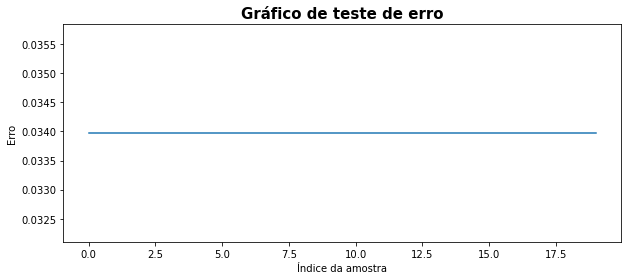


Vetor de Desempenho com dados desconhecidos pela rede neural: 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Acurácia da aprendizagem da rede com os dados desconhecidos: 
100%


In [300]:
#Criando novos dados que a rede não conhece
renda = np.array([1000, 1200, 1300, 3100, 2000, 1500, 1700, 1800, 1100, 2300, 1500, 1250, 1250, 1550, 1950, 2750, 1800,
                 1450, 1300, 1200])
idade = np.array([27, 25, 29, 30, 32, 25, 38, 35, 32, 27, 29, 24, 21, 34, 39, 28, 38, 39, 39, 49])
emprestimo = np.array([200, 300, 500, 1000, 800, 500, 500, 700, 300, 1000, 300, 300, 500, 500, 600, 500, 500, 400, 300,
                      500])
Yreal = np.array([-1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1])

#Definindo o número de amostras
amostra_q = 20http://localhost:8888/notebooks/OneDrive/Data%20Science/Inteligencia_Artificial/02_perceptron_de_camada_multipla.ipynb#3.2-Teste-e-avalia%C3%A7%C3%A3o-com-dados-desconhecidos

for amostra in range(amostra_q):
    #CALCULANDO AS SAÍDAS DAS CAMADAS
    #Inserindo o bias no vetor de entrada
    Xb = np.hstack([bias, X[:,amostra]]) #Entregando o padrão para a rede para propagação
        
    #Obtendo o campo induzido (1) para o cálculo da saída da camada escondida: o1
    V1 = np.dot(W1, Xb)
        
    #Aplicando tangente hiperbólica - Saída da camada escondida/intermediária
    o1 = np.tanh(V1)
        
    #Incluindo o bias ao vetor o1 - Saída da camada escondida é a entrada da camada de saída
    o1b = np.insert(o1, 0, bias)
        
    #Obtendo o campo induzido (2) para cálculo da camada de saída: y
    V2 = np.dot(W2, o1b)
        
    #Aplicando tangente hiperbólica - Resultado da camada de saída
    Ypredito = np.tanh(V2)
        
    #Calculando o erro
    teste_de_erro[amostra] = Yreal[amostra] - Ypredito
    
#Printando o teste de erro
print('Teste de Erro com dados desconhecidos pela rede neural: \n' + str(teste_de_erro),'\n')

#Gerando gráfico do erro total médio
plt.figure(figsize=(10, 4))
plt.plot((teste_de_erro - Yreal))
plt.title('Gráfico de teste de erro', fontsize=15, fontweight='bold')
plt.ylabel('Erro')
plt.xlabel('Índice da amostra')
plt.show()

#Printando a diferença entre o teste de erro e o y desejado/predito
teste_de_erro = np.round(teste_de_erro) #Arredondando valor devido ao valor decimal gerado pela tangente hiperbólica

#Printando vetor de desempenho 0-2
print()
print('Vetor de Desempenho com dados desconhecidos pela rede neural: \n' + str(teste_de_erro - Yreal) + '\n')
        #Espera-se um vetor zerado, significando acurácia igual a 100%

#Calculando a acurácia da aprendizagem da rede
acuracia = np.zeros(1)
vetor_de_acerto = teste_de_erro - Yreal #Criando variável de vetor de acerto
vetor_de_comparacao_esperado = np.zeros(20)
contagem_valores_dif_zero = 0
quantidade_valores_dif_zero_lista = []

if vetor_de_acerto in vetor_de_comparacao_esperado:
    print('Acurácia da aprendizagem da rede com os dados desconhecidos: \n' + str(100) + '%')
elif vetor_de_acerto not in vetor_de_comparacao_esperado:
    for i in vetor_de_acerto:
        if i not in vetor_de_comparacao_esperado:
            contagem_valores_dif_zero += 1

    #Cálculo da acurácia
    resultado = (1 - (np.array(contagem_valores_dif_zero)/amostra_q)) * 100

    #Imprimindo acurácia
    print(str(resultado) + '%')

### Considerações sobre a etapa de teste com dados desconhecidos pela rede neural

Com dados desconhecidos, a rede neural teve uma acurácia de 100%. Isso demonstra sua capacidade de generalizar seu aprendizado, sendo uma capacidade ótima. O gráfico acima demonstra sua estabilidade de acerto.